# 1 - EDA DATASET DIRECTORIO DE COMPAÑIAS DE LA SUPERINTENDENCIA

**AUTOR: Fabrizio Ramirez Cutimbo**

**OBJETIVOS:**

- Realizar un Análisis Exploratorio de Datos del dataset directorio_companias.xlsx que fue extraido de la Superintendencia de Compañías, Valores y Seguros del Ecuador.
- Limpiar registros anómalos y completar valores ausentes en el dataset.
- Enriquecer el conjunto de datos y desagregar columnas.
---

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar Datasets

In [2]:
# Carga de dataset directorio de compañías, se desplaza los headers hasta la fila 4
pd_dataset = pd.read_excel('directorio_companias.xlsx', dtype={'RUC': 'object'}, header=4)
# Carga de dataset de CIIU (Recurso de la Superintendencia de Compañias)
pd_dataset_ciiu = pd.read_csv("Datasets\\bi_ciiu.csv")

# Imprimir una muestra SOLO CABECERAS
pd_dataset.sample(0)

c:\Users\fabrizio\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,No. FILA,EXPEDIENTE,RUC,NOMBRE,SITUACIÓN LEGAL,FECHA_CONSTITUCION,TIPO,PAÍS,REGIÓN,PROVINCIA,...,BARRIO,TELÉFONO,REPRESENTANTE,CARGO,CAPITAL SUSCRITO,CIIU NIVEL 1,CIIU NIVEL 6,ÚLTIMO BALANCE,PRESENTÓ BALANCE INICIAL,FECHA PRESENTACIÓN BALANCE INICIAL


### Dimensión y columnas

In [3]:
print(f"Dimensiones del conjunto de datos: \n Filas: {pd_dataset.shape[0]}  \n Columnas: {pd_dataset.shape[1]}")

Dimensiones del conjunto de datos: 
 Filas: 213157  
 Columnas: 25


In [4]:
pd_dataset.columns

Index(['No. FILA', 'EXPEDIENTE', 'RUC', 'NOMBRE', 'SITUACIÓN LEGAL',
       'FECHA_CONSTITUCION', 'TIPO', 'PAÍS', 'REGIÓN', 'PROVINCIA', 'CANTÓN',
       'CIUDAD', 'CALLE', 'NÚMERO', 'INTERSECCIÓN', 'BARRIO', 'TELÉFONO',
       'REPRESENTANTE', 'CARGO', 'CAPITAL SUSCRITO', 'CIIU NIVEL 1',
       'CIIU NIVEL 6', 'ÚLTIMO BALANCE', 'PRESENTÓ BALANCE INICIAL',
       'FECHA PRESENTACIÓN BALANCE INICIAL'],
      dtype='object')

In [5]:
pd_dataset.dtypes

No. FILA                                int64
EXPEDIENTE                              int64
RUC                                    object
NOMBRE                                 object
SITUACIÓN LEGAL                        object
FECHA_CONSTITUCION                     object
TIPO                                   object
PAÍS                                   object
REGIÓN                                 object
PROVINCIA                              object
CANTÓN                                 object
CIUDAD                                 object
CALLE                                  object
NÚMERO                                 object
INTERSECCIÓN                           object
BARRIO                                 object
TELÉFONO                               object
REPRESENTANTE                          object
CARGO                                  object
CAPITAL SUSCRITO                       object
CIIU NIVEL 1                           object
CIIU NIVEL 6                      

### Numero de Nulos

+ Tabla con porcentaje de nullidad por columna.

In [6]:
# Calcular el porcentaje de valores nulos por columna
pd_dataset.isnull().mean() * 100

No. FILA                               0.000000
EXPEDIENTE                             0.000000
RUC                                    2.828901
NOMBRE                                 0.000000
SITUACIÓN LEGAL                        0.000000
FECHA_CONSTITUCION                     0.000000
TIPO                                   0.000000
PAÍS                                   0.000000
REGIÓN                                 0.000000
PROVINCIA                              0.000000
CANTÓN                                 0.000000
CIUDAD                                 0.000000
CALLE                                  0.436298
NÚMERO                                 2.611690
INTERSECCIÓN                           3.936535
BARRIO                                55.375615
TELÉFONO                               2.955568
REPRESENTANTE                          1.392401
CARGO                                  1.392401
CAPITAL SUSCRITO                       0.207359
CIIU NIVEL 1                           0

+ La columna RUC es la que hace la vez de clave ID, se deben analizar los casos nulos.

In [7]:
pd_dataset.isna().sum()

No. FILA                                   0
EXPEDIENTE                                 0
RUC                                     6030
NOMBRE                                     0
SITUACIÓN LEGAL                            0
FECHA_CONSTITUCION                         0
TIPO                                       0
PAÍS                                       0
REGIÓN                                     0
PROVINCIA                                  0
CANTÓN                                     0
CIUDAD                                     0
CALLE                                    930
NÚMERO                                  5567
INTERSECCIÓN                            8391
BARRIO                                118037
TELÉFONO                                6300
REPRESENTANTE                           2968
CARGO                                   2968
CAPITAL SUSCRITO                         442
CIIU NIVEL 1                             283
CIIU NIVEL 6                             283
ÚLTIMO BAL

### Valores únicos

Tipos de Empresas: 

Para este trabjar se utilizarán solo los tipos:
+ Anonimas: Empresas que trabajan por acciones
+ SAS: Nuevo tipo de empresas de fácil constitución
+ Responsabilidad Limitadad: Hasta 15 socios

Se calcula la frecuencia absoluta

In [8]:
pd.DataFrame(pd_dataset['TIPO'].value_counts().reset_index(name='Nro TOTAL'))

,TIPO,Nro TOTAL
0,ANÓNIMA,101905
1,SOCIEDAD POR ACCIONES SIMPLIFICADA,63546
2,RESPONSABILIDAD LIMITADA,46004
3,SUCURSAL EXTRANJERA,1377
4,ASOCIACIÓN O CONSORCIO,158
5,ANÓNIMA EN PREDIOS RÚSTICOS,82
6,ECONOMÍA MIXTA,70
7,ANÓNIMA MULTINACIONAL ANDINA,11
8,COMANDITA POR ACCIONES,4


Situación Legal: 

+ Se seleccionarán las compañías que se encuentren ACTIVAS

In [9]:
pd.DataFrame(pd_dataset['SITUACIÓN LEGAL'].value_counts().reset_index(name='Nro TOTAL'))

,SITUACIÓN LEGAL,Nro TOTAL
0,ACTIVA,167900
1,DISOLUCIÓN Y LIQUIDACIÓN OFICIO INSCRITA EN RM,27787
2,DISOLUCIÓN Y LIQUIDACIÓN DE PLENO DERECHO INSC...,8151
3,DISOLUCIÓN Y LIQUIDACIÓN OFICIO NO INSCRITA EN RM,6469
4,INACTIVA,830
5,DISOLUCIÓN Y LIQUIDACIÓN ANTICIPADA INSCRITA RM,659
6,DISOLUCIÓN Y LIQUIDACIÓN ANTIC. NO INSCRITA EN RM,566
7,DISOLUCIÓN Y LIQUIDACIÓ DE PLENO DERECHO NO IN...,281
8,CANCELACIÓN PERMISO OPERACIÓN - OFICIO INSCRIT...,211
9,NO SUJETO A CONTROL Y VIGILANCIA DE SCVS ART 432,158


País: 

+ Se seleccionarán las compañías que son de Ecuador

In [10]:
pd.DataFrame(pd_dataset['PAÍS'].value_counts().reset_index(name='Nro TOTAL'))

,PAÍS,Nro TOTAL
0,ECUADOR,211782
1,COLOMBIA,249
2,ESPAÑA,237
3,ESTADOS UNIDOS DE AMERICA,179
4,PANAMA,104
...,...,...
64,QATAR,1
65,REPUBLICA DOMINICANA,1
66,KAZAJSTAN,1
67,JERSEY,1


Región

In [11]:
pd.DataFrame(pd_dataset['REGIÓN'].value_counts().reset_index(name='Nro TOTAL'))

,REGIÓN,Nro TOTAL
0,COSTA,107425
1,SIERRA,96943
2,ORIENTE,7414
3,GALÁPAGOS,1375


Provincia

In [12]:
pd.DataFrame(pd_dataset['PROVINCIA'].value_counts().reset_index(name='Nro TOTAL'))

,PROVINCIA,Nro TOTAL
0,GUAYAS,83129
1,PICHINCHA,66915
2,AZUAY,10650
3,MANABI,9807
4,EL ORO,6728
5,TUNGURAHUA,3933
6,LOS RIOS,3401
7,LOJA,2887
8,SANTO DOMINGO DE LOS TSACHILAS,2879
9,IMBABURA,2653


Presentó Balance Inicial

In [ ]:
pd.DataFrame(pd_dataset['PRESENTÓ BALANCE INICIAL'].value_counts().reset_index(name='Nro TOTAL'))

,PRESENTÓ BALANCE INICIAL,Nro TOTAL
0,NO APLICA,112271
1,SI,79956
2,NO,20930


CIIU NIVEL 1

In [14]:
pd.DataFrame(pd_dataset['CIIU NIVEL 1'].value_counts().reset_index(name='Nro TOTAL'))

,CIIU NIVEL 1,Nro TOTAL
0,G,53225
1,M,27168
2,F,20292
3,H,18154
4,N,16159
5,C,14330
6,A,12693
7,L,12270
8,J,9640
9,I,5876


## Limpieza de datos

#### Campo RUC
+ Se descartan registros que no tengan número de RUC

In [15]:
print('Tamaño Antes: ', pd_dataset.shape)
pd_dataset = pd_dataset.dropna(subset=['RUC'])
print('Tamaño Despues: ', pd_dataset.shape)

Tamaño Antes:  (213157, 25)
Tamaño Despues:  (207127, 25)


+ Se identifican registros con RUC Inválido, luego se eliminan

In [16]:
pd_filtro_RUCs_invalidos = pd_dataset[~pd_dataset['RUC'].str.match(r'^\d{13}$')]
print(f'Registros con RUC inválido {pd_filtro_RUCs_invalidos.shape[0]}')
pd_filtro_RUCs_invalidos['RUC'].head(5)

Registros con RUC inválido 9


185643              099
200489     099337330001
203925     099337870001
205422     099338153500
206270    O195123391001
Name: RUC, dtype: object

+ Eliminar Compañías con RUCs Invalidos

In [17]:
print('Tamaño Antes: ', pd_dataset.shape)
pd_dataset = pd_dataset[pd_dataset['RUC'].str.match(r'^\d{13}$')]
print('Tamaño Despues: ', pd_dataset.shape)

Tamaño Antes:  (207127, 25)
Tamaño Despues:  (207118, 25)


#### Campo CIIU

+ Se descartan todas las compañías que no tengana registrada una Actividad Económica CIIU Nivel 1 y 6

In [18]:
print('Se detecta que existen ', pd_dataset['CIIU NIVEL 1'].isna().sum(), ' Compañías sin CIIU Nivel 1')
print('Se detecta que existen ', pd_dataset['CIIU NIVEL 6'].isna().sum(), ' Compañías sin CIIU Nivel 6')

Se detecta que existen  264  Compañías sin CIIU Nivel 1
Se detecta que existen  264  Compañías sin CIIU Nivel 6


+ Eliminar Compañías que no tengan CIIU Nivel 1

In [19]:
print('Tamaño Antes: ', pd_dataset.shape)
pd_dataset = pd_dataset.dropna(subset=['CIIU NIVEL 1'])
print('Tamaño Despues: ', pd_dataset.shape)

Tamaño Antes:  (207118, 25)
Tamaño Despues:  (206854, 25)


+ A la par se eliminan las compañías que no tenían CIIU Nivel 6 

In [20]:
print(f'Se detecta que existen {pd_dataset['CIIU NIVEL 6'].isna().sum()} Compañías sin CIIU Nivel 6')

Se detecta que existen 0 Compañías sin CIIU Nivel 6


+ Se valida el formato de codigos CIIU Nivel 6, que debe ser del siguiente modo:

    - 1 Letra, 4 numeros, 1 punto y 2 numeros
    - En total 8 caracteres

In [21]:
lengths = pd_dataset['CIIU NIVEL 6'].str.len()
max_length = lengths.max()
min_length = lengths.min()

print(f"Longitud de la cadena más larga: {max_length}")
print(f"Longitud de la cadena más corta: {min_length}")


invalid_values = pd_dataset[~pd_dataset['CIIU NIVEL 6'].str.match(r'^[A-Z]\d{4}\.\d{2}$')]
print(f"Compañias que no respetan el formato: {invalid_values.shape[0]}")
invalid_values['CIIU NIVEL 6'].value_counts()
# Se observa que todas las compañías que no cumplen con el formato se encuentran inactivas o en proceso de disolución, estas se retirarán más adelante
invalid_values['SITUACIÓN LEGAL'].value_counts()

Longitud de la cadena más larga: 8
Longitud de la cadena más corta: 8
Compañias que no respetan el formato: 38


SITUACIÓN LEGAL
DISOLUCIÓN Y LIQUIDACIÓN OFICIO INSCRITA EN RM       24
DISOLUCIÓN Y LIQUIDACIÓN OFICIO NO INSCRITA EN RM    10
INACTIVA                                              3
DISOLUCIÓN Y LIQUIDACIÓN ANTICIPADA INSCRITA RM       1
Name: count, dtype: int64

Nota: Se observa que todas las compañías que no cumplen con el formato se encuentran inactivas o en proceso de disolución, estas se retirarán más adelante

+ Se eliminan tildes en las columnas CANTON Y PROVINCIA y se mantienen las letras Ñ

Se realiza este ajuste para más adelante enriquecer el dataset con coordenadas (Latitud y Longitud)

In [22]:
filtro_tildes = pd_dataset['CANTÓN'].str.contains(r'[ÁÉÍÓÚ]', na=False)
print(f'Registros que contienen tildes en CANTON: {pd_dataset[filtro_tildes].shape}')

Registros que contienen tildes en CANTON: (9688, 25)


In [23]:
reemplazos = {
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U'
}

# Reemplazar los caracteres en las columnas 'PROVINCIA' y 'CANTÓN'
pd_dataset['PROVINCIA'] = pd_dataset['PROVINCIA'].replace(reemplazos, regex=True)
pd_dataset['CANTÓN'] = pd_dataset['CANTÓN'].replace(reemplazos, regex=True)

+ Cambios de nombre exactos para posterior visualización en mapas

In [24]:
pd_dataset['CANTÓN'] = pd_dataset['CANTÓN'].replace('RUMINAHUI', 'RUMIÑAHUI')
pd_dataset['CANTÓN'] = pd_dataset['CANTÓN'].replace('PABLO VI', 'PABLO SEXTO')

pd_dataset.loc[pd_dataset['PROVINCIA'] == 'CARCHI', 'CANTÓN'] = pd_dataset.loc[pd_dataset['PROVINCIA'] == 'CARCHI', 'CANTÓN'].replace('BOLIVAR', 'BOLIVAR (CARCHI)')
pd_dataset.loc[pd_dataset['PROVINCIA'] == 'MANABI', 'CANTÓN'] = pd_dataset.loc[pd_dataset['PROVINCIA'] == 'MANABI', 'CANTÓN'].replace('BOLIVAR', 'BOLIVAR (MANABI)')

pd_dataset.loc[pd_dataset['PROVINCIA'] == 'LOJA', 'CANTÓN'] = pd_dataset.loc[pd_dataset['PROVINCIA'] == 'LOJA', 'CANTÓN'].replace('OLMEDO', 'OLMEDO (LOJA)')
pd_dataset.loc[pd_dataset['PROVINCIA'] == 'MANABI', 'CANTÓN'] = pd_dataset.loc[pd_dataset['PROVINCIA'] == 'MANABI', 'CANTÓN'].replace('OLMEDO', 'OLMEDO (MANABI)')

## EDA antes de Filtros **(Se traslada al paso 3)**

In [25]:
# # Agrupar por "TIPO" de compañía
# tipo_activity_counts = pd_dataset.groupby(['TIPO']).size().reset_index(name='Num_Compañías')

# # Ordenar de Mayor a menor
# tipo_activity_counts = tipo_activity_counts.sort_values(by='Num_Compañías', ascending=False)

# # Agrupar a partir del quinto elemento como "Otras"
# if len(tipo_activity_counts) > 4:
#     top_4 = tipo_activity_counts.head(4)
#     otras = tipo_activity_counts.iloc[4:].sum(numeric_only=True)
#     otras_row = pd.DataFrame([['Otras', otras['Num_Compañías']]], columns=['TIPO', 'Num_Compañías'])
#     tipo_activity_counts = pd.concat([top_4, otras_row], ignore_index=True)

# # Calcular porcentaje respecto al total
# tipo_activity_counts['Porcentaje'] = (tipo_activity_counts['Num_Compañías'] / tipo_activity_counts['Num_Compañías'].sum()) * 100

# # Crear la figura con dos subgráficas
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# # Gráfica de la izquierda: Porcentaje respecto al total
# sns.barplot(x='Porcentaje', y='TIPO', data=tipo_activity_counts, ax=axes[0], palette="Blues_r")
# axes[0].set_title('Tipos de compañías en Ecuador', fontsize=14)
# axes[0].set_xlabel('', fontsize=10)
# axes[0].set_ylabel('', fontsize=10)

# # Mostrar el número y porcentaje al final de cada barra en la gráfica de la izquierda
# for p, num, perc in zip(axes[0].patches, tipo_activity_counts['Num_Compañías'], tipo_activity_counts['Porcentaje']):
#     width = p.get_width()
#     axes[0].text(width + 0.5, p.get_y() + p.get_height() / 2,
#                  f'{num} ({perc:.1f}%)', va='center', fontsize=12, color='black')

# # Configuración estética para la gráfica de la izquierda
# axes[0].tick_params(left=False, bottom=False)
# axes[0].spines['top'].set_visible(False)
# axes[0].spines['right'].set_visible(False)
# axes[0].spines['left'].set_visible(False)
# axes[0].spines['bottom'].set_visible(False)


# # Ajustar el diseño
# plt.tight_layout()
# plt.show()


## Aplicación de Filtros

Se filtra por: 
+ Empresas que se encuentren **ACTIVAS**
+ Empresas de tipo: **"Anónima", "Sociedad por acciones simplificadas (SAS)" y "Responsabilidad Limitada"**

In [26]:
print('Dataset dimensión Original', pd_dataset.shape)
pd_filtered_dataset = pd_dataset[pd_dataset['SITUACIÓN LEGAL']=='ACTIVA']
print('Dataset solo empresas Activas', pd_filtered_dataset.shape)
pd_filtered_dataset = pd_filtered_dataset[pd_filtered_dataset['TIPO'].isin(['ANÓNIMA', 'SOCIEDAD POR ACCIONES SIMPLIFICADA', 'RESPONSABILIDAD LIMITADA'])]
print('Dataset Tipos Seleccionados', pd_filtered_dataset.shape)

Dataset dimensión Original (206854, 25)
Dataset solo empresas Activas (165869, 25)
Dataset Tipos Seleccionados (164888, 25)


+ Dado que el dataset se enriquecerá posteriormente con "Información Financiera", 
+ Se evalúan las empresas que hayan presentado información financiera al menos hace un año (2022).

In [27]:
pd.DataFrame(pd_filtered_dataset['ÚLTIMO BALANCE'].value_counts().reset_index(name='Nro TOTAL'))

,ÚLTIMO BALANCE,Nro TOTAL
0,2023.0,121262
1,2022.0,5986
2,2021.0,2735
3,2020.0,1988
4,2018.0,1805
5,2019.0,1559
6,2017.0,1428
7,2016.0,24
8,1998.0,6
9,2011.0,4


In [28]:
print('Dataset Shape Antes: ', pd_filtered_dataset.shape)
pd_filtered_dataset = pd_filtered_dataset[pd_filtered_dataset['ÚLTIMO BALANCE']>=2022]
print('Dataset Shape Despues: ', pd_filtered_dataset.shape)

Dataset Shape Antes:  (164888, 25)
Dataset Shape Despues:  (127248, 25)


#### Filtrado a nivel de Columnas
+ Se **eliminan** las columnas que no aportan valor 

In [29]:
print(f'Columnas Originales: {pd_filtered_dataset.columns}') 

Columnas Originales: Index(['No. FILA', 'EXPEDIENTE', 'RUC', 'NOMBRE', 'SITUACIÓN LEGAL',
       'FECHA_CONSTITUCION', 'TIPO', 'PAÍS', 'REGIÓN', 'PROVINCIA', 'CANTÓN',
       'CIUDAD', 'CALLE', 'NÚMERO', 'INTERSECCIÓN', 'BARRIO', 'TELÉFONO',
       'REPRESENTANTE', 'CARGO', 'CAPITAL SUSCRITO', 'CIIU NIVEL 1',
       'CIIU NIVEL 6', 'ÚLTIMO BALANCE', 'PRESENTÓ BALANCE INICIAL',
       'FECHA PRESENTACIÓN BALANCE INICIAL'],
      dtype='object')


**IMPORTANTE**: En esta parte se eliminan "Identificadores" (NOMBRE) y "PseudoIdentificadores" (DIRECCION, TELEFONO, etc.) existentes en el dataset. También se elimina el dato personal "REPRESENTANTE" identificado.

In [30]:
pd_filtered_dataset.drop(columns=['No. FILA', 'CALLE', 'NÚMERO', 'NOMBRE', 'INTERSECCIÓN', 'BARRIO', 'TELÉFONO',
       'REPRESENTANTE', 'CARGO', 'PRESENTÓ BALANCE INICIAL', 'FECHA PRESENTACIÓN BALANCE INICIAL', 'CAPITAL SUSCRITO', 'ÚLTIMO BALANCE'], inplace=True)
print(f'Columnas restantes: {pd_filtered_dataset.columns}')

Columnas restantes: Index(['EXPEDIENTE', 'RUC', 'SITUACIÓN LEGAL', 'FECHA_CONSTITUCION', 'TIPO',
       'PAÍS', 'REGIÓN', 'PROVINCIA', 'CANTÓN', 'CIUDAD', 'CIIU NIVEL 1',
       'CIIU NIVEL 6'],
      dtype='object')


+ Se **renombran** algunas columnas

In [31]:
pd_filtered_dataset = pd_filtered_dataset.rename(columns={
    'SITUACIÓN LEGAL':'SITUACION_LEGAL',
    'PAÍS':'PAIS',
    'REGIÓN':'REGION', 
    'CANTÓN': 'CANTON',
    'CIIU NIVEL 1': 'CIIU_NIVEL_1', 
    'CIIU NIVEL 6': 'CIIU_NIVEL_6'
})

In [32]:
pd_filtered_dataset.isna().sum()

EXPEDIENTE            0
RUC                   0
SITUACION_LEGAL       0
FECHA_CONSTITUCION    0
TIPO                  0
PAIS                  0
REGION                0
PROVINCIA             0
CANTON                0
CIUDAD                0
CIIU_NIVEL_1          0
CIIU_NIVEL_6          0
dtype: int64

## Generación Nuevas columnas

### CIIU Sectores y Actividades Económicas

+ Se creará la columnas CIIU_NIVEL_3 y CIIU_NIVEL_4 que corresponde a la "Clase" pues representa un nivel de detalle intermedio ni tan general ni tan específico:

| Nivel   | Nomenclatura | Dato             | Ejemplo   |
|---------|--------------|------------------|-----------|
| Nivel 1 | SECCION      | Alfanumérico     | C         |
| Nivel 2 | DIVISION     | 2 dígitos        | C10       |
| Nivel 3 | GRUPO        | 3 dígitos        | C106      |
| **Nivel 4** | **CLASE** | **4 dígitos**   | **C1061** |
| Nivel 5 | SUBCLASE     | 5 dígitos        | C1061.1   |
| Nivel 6 | ACTIVIDAD    | 6 dígitos        | C1061.11  |

+ Las columnas se crean a partir del CIIU_NIVEL_6 que tiene toda esta información

In [33]:
pd_filtered_dataset['CIIU_NIVEL_3'] = pd_filtered_dataset['CIIU_NIVEL_6'].str[:4]

In [34]:
pd_filtered_dataset['CIIU_NIVEL_4'] = pd_filtered_dataset['CIIU_NIVEL_6'].str[:5]

In [35]:
pd_filtered_dataset['CIIU_NIVEL_4'].sample(3)

89147     P8549
175348    G4772
131290    J6110
Name: CIIU_NIVEL_4, dtype: object

Se PROCESA el dataset **bi_ciiu.csv** que fue extraido de la superintendencia de compañias
+ Se elimina la tabulación de relleno al final del codigo CIIU
+ Se elimina el punto '.' al final de cada Descripción

In [36]:
pd_dataset_ciiu['ciiu'] =  pd_dataset_ciiu['ciiu'].str.strip()
pd_dataset_ciiu['descripcion'] = pd_dataset_ciiu['descripcion'].str.rstrip('.')

+ Se combina el dataset Principal con el dataset CIIU a nivel de **CIIU_NIVEL_1** para obtener la "Descripción", luego se renombra.

In [37]:
pd_merged = pd_filtered_dataset.merge(pd_dataset_ciiu, left_on='CIIU_NIVEL_1', right_on='ciiu', how='left' )

In [38]:
pd_merged = pd_merged.drop(columns=['ciiu'])
pd_merged = pd_merged.rename(columns={'descripcion': 'CIIU_NIVEL_1_DESC'})

+ Se combina el dataset Principal con el dataset CIIU a nivel de **CIIU_NIVEL_3** para obtener la "Descripción", luego se renombra.

In [39]:
pd_merged = pd_merged.merge(pd_dataset_ciiu, left_on='CIIU_NIVEL_3', right_on='ciiu', how='left' )

In [40]:
pd_merged = pd_merged.drop(columns=['ciiu'])
pd_merged = pd_merged.rename(columns={'descripcion': 'CIIU_NIVEL_3_DESC'})

+ Se combina el dataset Principal con el dataset CIIU a nivel de **CIIU_NIVEL_4** para obtener la "Descripción", luego se renombra.

In [41]:
pd_merged = pd_merged.merge(pd_dataset_ciiu, left_on='CIIU_NIVEL_4', right_on='ciiu', how='left' )

In [42]:
pd_merged = pd_merged.drop(columns=['ciiu'])
pd_merged = pd_merged.rename(columns={'descripcion': 'CIIU_NIVEL_4_DESC'})

+ Se combina el dataset Principal con el dataset CIIU a nivel de **CIIU_NIVEL_6** para obtener la "Descripción", luego se renombra.

In [43]:
pd_merged = pd_merged.merge(pd_dataset_ciiu, left_on='CIIU_NIVEL_6', right_on='ciiu', how='left' )

In [44]:
pd_merged = pd_merged.drop(columns=['ciiu'])
pd_merged = pd_merged.rename(columns={'descripcion': 'CIIU_NIVEL_6_DESC'})

In [45]:
pd_filtered_dataset = pd_merged
pd_filtered_dataset.sample(3)

,EXPEDIENTE,RUC,SITUACION_LEGAL,FECHA_CONSTITUCION,TIPO,PAIS,REGION,PROVINCIA,CANTON,CIUDAD,CIIU_NIVEL_1,CIIU_NIVEL_6,CIIU_NIVEL_3,CIIU_NIVEL_4,CIIU_NIVEL_1_DESC,CIIU_NIVEL_3_DESC,CIIU_NIVEL_4_DESC,CIIU_NIVEL_6_DESC
33894,155210,1792023815001,ACTIVA,21/02/2006,ANÓNIMA,ECUADOR,SIERRA,PICHINCHA,QUITO,QUITO,G,G4649.94,G464,G4649,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,VENTA AL POR MAYOR DE ENSERES DOMÉSTICOS,VENTA AL POR MAYOR DE OTROS ENSERES DOMÉSTICOS,VENTA AL POR MAYOR DE ARTÍCULOS DE CUERO Y ACC...
3531,28270,0991104658001,ACTIVA,27/12/1990,RESPONSABILIDAD LIMITADA,ECUADOR,COSTA,GUAYAS,GUAYAQUIL,GUAYAQUIL,G,G4662.02,G466,G4662,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,OTRAS ACTIVIDADES DE VENTA AL POR MAYOR ESPECI...,VENTA AL POR MAYOR DE METALES Y MINERALES META...,VENTA AL POR MAYOR DE PRODUCTOS SEMIACABADOS D...
51265,307435,1891775179001,ACTIVA,11/07/2017,RESPONSABILIDAD LIMITADA,ECUADOR,SIERRA,TUNGURAHUA,SAN PEDRO DE PELILEO,PELILEO,G,G4641.11,G464,G4641,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÓ...,VENTA AL POR MAYOR DE ENSERES DOMÉSTICOS,"VENTA AL POR MAYOR DE TEXTILES, PRENDAS DE VES...","VENTA AL POR MAYOR DE HILOS (HILADOS), LANAS Y..."


### Reordenar Columnas

In [46]:
pd_filtered_dataset = pd_filtered_dataset[['EXPEDIENTE', 'RUC', 'SITUACION_LEGAL', 'FECHA_CONSTITUCION',
       'TIPO', 'PAIS', 'REGION', 'PROVINCIA', 'CANTON', 'CIUDAD',
       'CIIU_NIVEL_1', 'CIIU_NIVEL_1_DESC', 'CIIU_NIVEL_3', 'CIIU_NIVEL_3_DESC',
       'CIIU_NIVEL_4', 'CIIU_NIVEL_4_DESC', 'CIIU_NIVEL_6', 'CIIU_NIVEL_6_DESC']]

In [47]:
pd_filtered_dataset.sample(1)

,EXPEDIENTE,RUC,SITUACION_LEGAL,FECHA_CONSTITUCION,TIPO,PAIS,REGION,PROVINCIA,CANTON,CIUDAD,CIIU_NIVEL_1,CIIU_NIVEL_1_DESC,CIIU_NIVEL_3,CIIU_NIVEL_3_DESC,CIIU_NIVEL_4,CIIU_NIVEL_4_DESC,CIIU_NIVEL_6,CIIU_NIVEL_6_DESC
70917,333918,0993371415001,ACTIVA,08/04/2022,RESPONSABILIDAD LIMITADA,ECUADOR,COSTA,GUAYAS,GUAYAQUIL,GUAYAQUIL,I,ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE CO...,I561,ACTIVIDADES DE RESTAURANTES Y DE SERVICIO MÓVI...,I5610,ACTIVIDADES DE RESTAURANTES Y DE SERVICIO MÓVI...,I5610.01,"RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE..."


### Análisis Descriptivo (Gráfico)

#### Conteo de Actividades económicas

C:\Users\fabrizio\AppData\Local\Temp\ipykernel_13764\2358369955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.values, y=company_counts.index, palette="Blues_r")


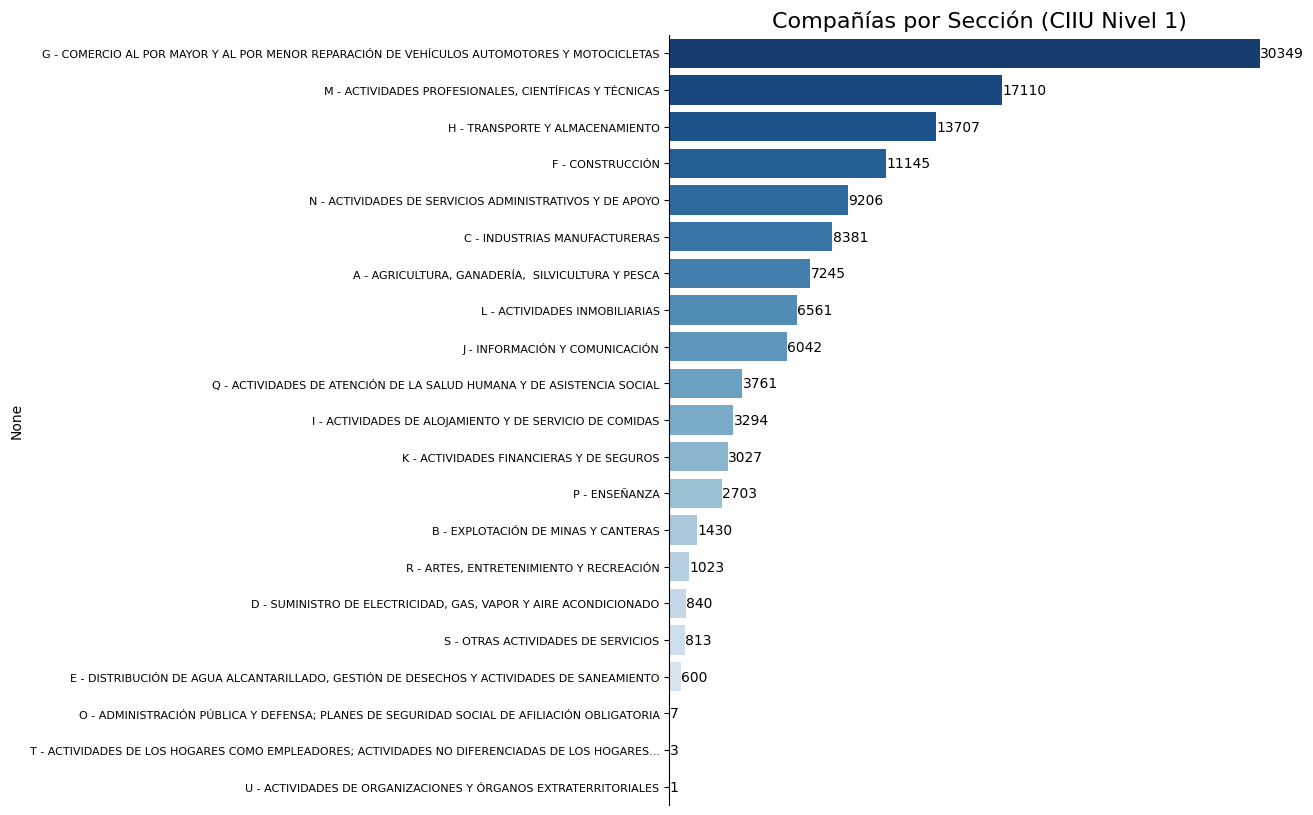

In [48]:
# # Dataset para gráfico y truncar las descripciones por si sonmuy grandes
company_counts = pd_filtered_dataset['CIIU_NIVEL_1'].astype(str) + " - " + pd_filtered_dataset['CIIU_NIVEL_1_DESC']
company_counts = company_counts.apply(lambda x: x[:92] + '...' if len(x) > 92 else x)
company_counts = company_counts.value_counts()
company_counts

# Dimensión del gráfico
plt.figure(figsize=(8, 10))

# Tipo de gráfico con barras más gruesas
sns.barplot(x=company_counts.values, y=company_counts.index, palette="Blues_r")

# Detalles Visuales al gráfico
plt.title('Compañías por Sección (CIIU Nivel 1)', fontsize=16)
plt.xticks([])  # Elimina los ticks del eje X
plt.yticks(fontsize=8)  # Reduce el tamaño de las etiquetas en el eje Y

# Eliminar la línea del eje X
plt.gca().spines['bottom'].set_linewidth(0)

# Elimina bordes del gráfico
sns.despine()

# Mostrar el número al final de cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_width() + 10, p.get_y() + p.get_height() / 2, 
                   f'{int(p.get_width())}', va='center', fontsize=10, color='black')

# Mostrar el gráfico
plt.show()

### Exportar Dataset Procesado
Se exporta este dataset con todas las actividades ecónómicas para realizar el Location Quotient

In [49]:
print(f'Tamaño del dataset: {pd_filtered_dataset.shape}')

Tamaño del dataset: (127248, 18)


In [50]:
# Se exporta este dataset con todas las actividades ecónómicas para realizar el Location Quotient
pd_filtered_dataset.to_csv('Datasets Procesados\\directorio_empresas.csv', index=False)

### Dataset Filtrado Final Para Clustering **(Se traslada al paso 3)**

Se consideran las siguientes categorías
+ A - AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA
+ C - INDUSTRIAS MANUFACTURERAS
+ I - ALOJAMIENTO Y COMIDAS
+ J - INFORMACIÓN Y COMUNICACIÓN.
+ K - ACTIVIDADES FINANCIERAS Y DE SEGUROS.
+ L - ACTIVIDADES INMOBILIARIAS. (Excluida tras primera iteración pruebas)

In [51]:
# print('Dataset Shape Antes: ', pd_filtered_dataset.shape)
# pd_filtered_dataset = pd_filtered_dataset[pd_filtered_dataset['CIIU_NIVEL_1'].isin(['A', 'C', 'I', 'J', 'K'])]
# print('Dataset Shape Despues: ', pd_filtered_dataset.shape)

### Exportar Dataset Procesado

In [52]:
# pd_filtered_dataset.to_csv('Datasets Procesados\\directorio_empresas.csv', index=False)